## Importing libraries and loading data

In [263]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.precision', 2)
import matplotlib.pyplot as plt
import seaborn as sns
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [264]:
data=pd.read_csv("AB_NYC_2019.csv")

In [265]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [266]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.89e+04,4.89e+04,48895.00,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00,48895.00
mean,1.90e+07,6.76e+07,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,1.10e+07,7.86e+07,0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,2.54e+03,2.44e+03,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,9.47e+06,7.82e+06,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,1.97e+07,3.08e+07,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,2.92e+07,1.07e+08,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,3.65e+07,2.74e+08,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


In [267]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [268]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
data.drop(['id','host_name','last_review'], axis=1, inplace=True)
#examing the changes
data.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,0.10,1,0


In [269]:
#In the data, number_of_reviews is zero where reviews_per_month is null, so it means reviews_per_month is basically zero when there are zero totl reviews.
#Hence imputing NaN with 0
data['reviews_per_month'].fillna(0,inplace = True)

In [270]:
data.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,0.10,1,0


In [271]:
data['host_id'] = data['host_id'].astype(str)

## Exploratory data analysis

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

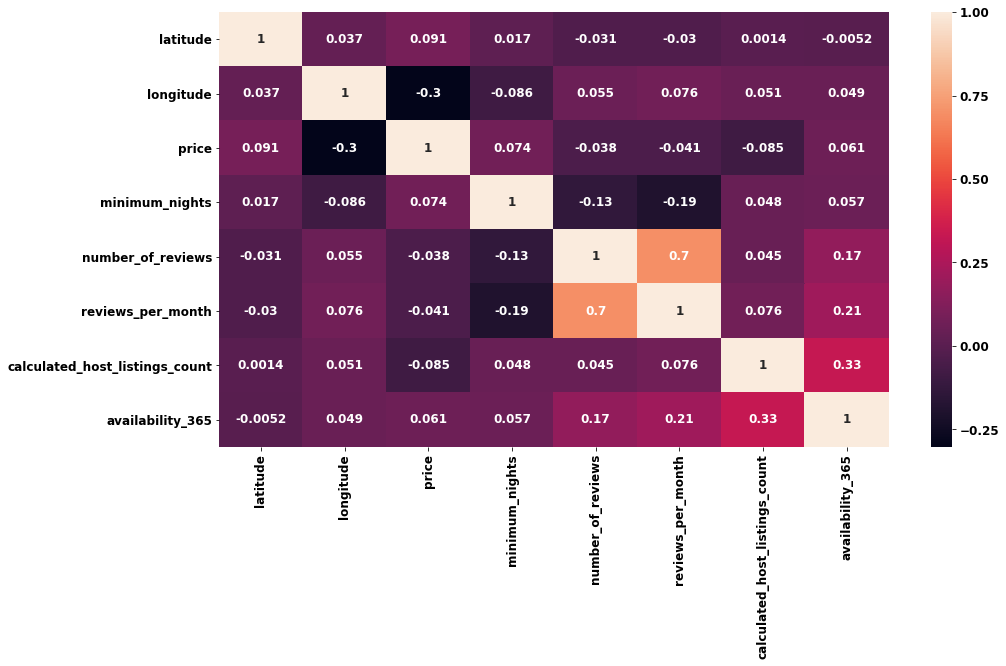

In [272]:
corr = data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns


We can see that number_of_Reviews and reviews_per_month are highly correlated which is obvious

Text(0.5, 1.0, 'Neighbourhood Group')

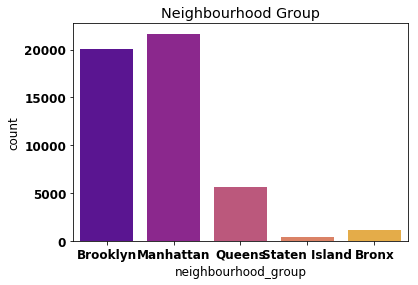

In [273]:
sns.countplot(data['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
plt.title('Neighbourhood Group')

Neigbourhood group Manhattan has the costliest houses

Text(0.5, 1.0, 'Room type')

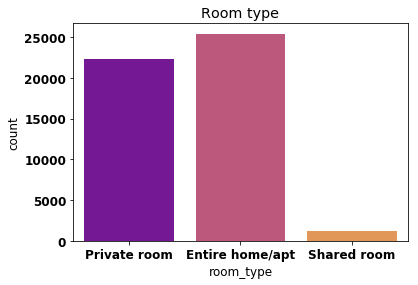

In [274]:
sns.countplot(data['room_type'], palette="plasma")
fig = plt.gcf()
plt.title('Room type')

Entire home/ apt are costlier than private room & shared room

In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
name                              48879 non-null object
host_id                           48895 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(5), object(5)
memory usage: 4.8+ MB


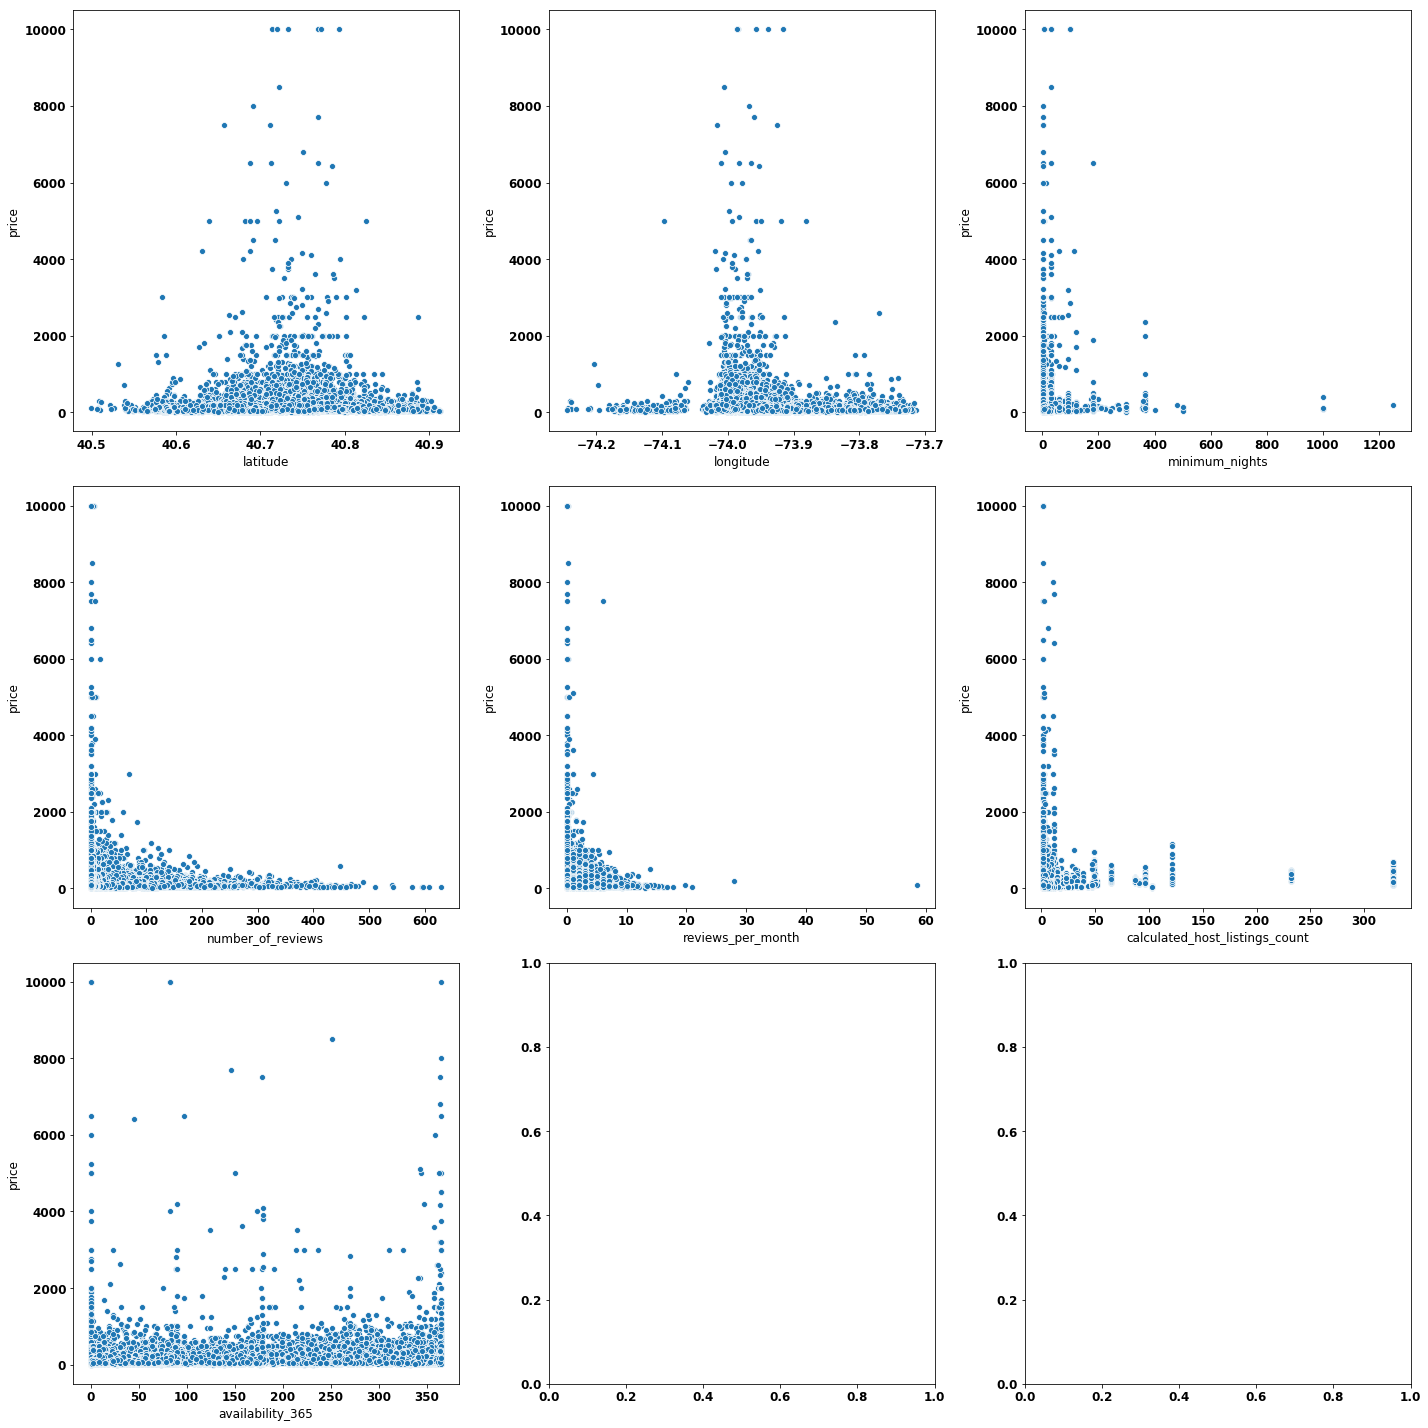

In [276]:
#visualizing numerical variables
fig, axs = plt.subplots(3,3,figsize=(20,20))
#
plt1 = sns.scatterplot(x = 'latitude', y = 'price', data = data, ax = axs[0,0])

plt2 = sns.scatterplot(x = 'longitude', y = 'price', data = data, ax = axs[0,1])

plt3 = sns.scatterplot(x = 'minimum_nights', y = 'price', data = data, ax = axs[0,2])

plt4 = sns.scatterplot(x = 'number_of_reviews', y = 'price', data = data, ax = axs[1,0])

plt5 = sns.scatterplot(x = 'reviews_per_month', y = 'price', data = data, ax = axs[1,1])

plt6 = sns.scatterplot(x = 'calculated_host_listings_count', y = 'price', data = data, ax = axs[1,2])

plt7 = sns.scatterplot(x = 'availability_365', y = 'price', data = data, ax = axs[2,0])

plt.tight_layout()
plt.show()

Clearly we have a lot of outliers and also we can see negative linear relation of price with some variables like minimum_nights, number_of_Reviews, etc

In [277]:
# dropping values beyond 95 percentile and less than 5 percentile and replacing them with 95th and 5th percentile values respectively 
num_col = list(data.dtypes[data.dtypes !='object'].index)
for col in num_col:
    percentile_high=data[col].quantile([.95]).values
    data[col][data[col]>percentile_high[0]]=percentile_high[0]
    percentile_low=data[col].quantile([.05]).values
    data[col][data[col]<percentile_low[0]]=percentile_low[0]
 

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
name                              48879 non-null object
host_id                           48895 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(5), object(5)
memory usage: 4.8+ MB


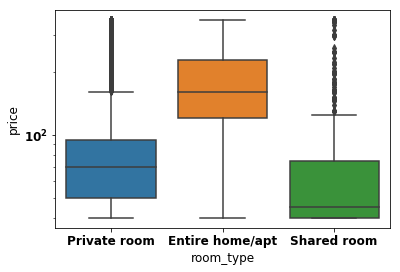

In [279]:
sns.boxplot(x="room_type",y="price", data=data)
plt.yscale('log')
plt.show()

In [280]:
le = preprocessing.LabelEncoder()
le.fit(data['neighbourhood_group'])    
data['neighbourhood_group']=le.transform(data['neighbourhood_group'])

le = preprocessing.LabelEncoder()
le.fit(data['neighbourhood'])
data['neighbourhood']=le.transform(data['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(data['room_type'])
data['room_type']=le.transform(data['room_type'])

data.sort_values(by='price',ascending=True,inplace=True)

data.head()


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
4663,Lovely room in big shared Brooklyn Brownstone,13208084,1,51,40.68,-73.95,1,40,28,13,0.22,3,318
41176,Big sunny room in Sunnyside,158126190,3,189,40.74,-73.93,1,40,7,2,0.40,1,0
31379,Cozy Brooklyn Apt (Near JFK/Manhattan/Times Sqr),73592174,1,128,40.65,-73.96,1,40,1,4,0.29,1,84
14914,"Cozy room available in Bed-Stuy, BK",2384086,1,13,40.69,-73.95,1,40,5,0,0.00,1,0
41179,Private room in spacious uptown NYC apartment,240194042,2,94,40.82,-73.95,1,40,21,0,0.00,1,0


## Simple Linear Regression

In [281]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression

In [282]:
lm = LinearRegression()

In [283]:
X = data[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = data['price']

In [284]:
#Splitting into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [285]:
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Predictions with simple regression

In [286]:
predicts = lm.predict(X_test)

In [287]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [288]:
print("Root mean squared error is:")
np.sqrt(metrics.mean_squared_error(y_test,predicts))

Root mean squared error is:


64.44030958051793

In [289]:
print('r2 score is:')
r2 = r2_score(y_test,predicts)
r2*100

r2 score is:


42.88935835308762

In [290]:
print("Mean absolute error is:")
mean_absolute_error(y_test,predicts)

Mean absolute error is:


47.14088057274041

In [291]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predicts.flatten()})
error_diff1 = error_diff.head(20)

In [292]:
error_diff1.head(5)

,Actual Values,Predicted Values
0,40,53.14
1,280,184.23
2,77,61.51
3,250,184.11
4,80,71.55


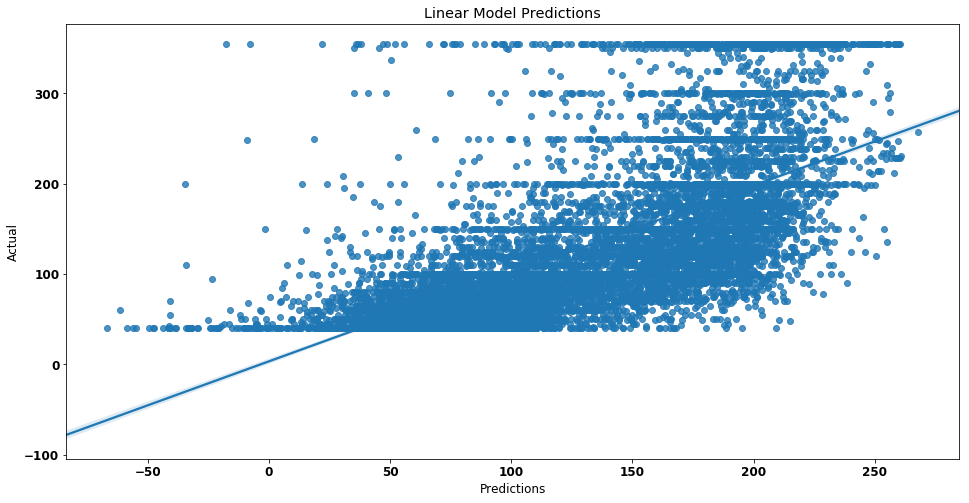

In [293]:
plt.figure(figsize=(16,8))
sns.regplot(predicts,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.show()

## Ridge regression

In [294]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))


0.4414137505477709
0.4288937325793406


In [295]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[1.0, 5.0, 10.0,20.0,50.0,100.0,150.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    5.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 150.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [296]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.04,4.18e-03,3.89e-03,6.98e-04,1.0,{'alpha': 1.0},0.43,0.42,0.43,0.45,0.45,0.45,0.46,0.44,0.44,0.43,0.44,0.01,1,0.44,0.44,0.44,0.44,0.44,0.44,0.44,0.44,0.44,0.44,0.44,1.25e-03
1,0.04,7.02e-03,5.09e-03,1.04e-03,5.0,{'alpha': 5.0},0.43,0.42,0.42,0.45,0.45,0.44,0.46,0.44,0.44,0.43,0.44,0.01,2,0.44,0.44,0.44,0.44,0.44,0.44,0.44,0.44,0.44,0.44,0.44,1.24e-03
2,0.05,9.03e-03,5.18e-03,9.76e-04,10.0,{'alpha': 10.0},0.43,0.42,0.42,0.44,0.45,0.44,0.46,0.43,0.44,0.43,0.44,0.01,3,0.44,0.44,0.44,0.44,0.44,0.44,0.44,0.44,0.44,0.44,0.44,1.24e-03
3,0.04,7.48e-03,5.20e-03,1.24e-03,20.0,{'alpha': 20.0},0.43,0.42,0.42,0.44,0.44,0.44,0.45,0.43,0.43,0.43,0.43,0.01,4,0.43,0.43,0.43,0.43,0.43,0.43,0.43,0.43,0.43,0.43,0.43,1.22e-03
4,0.04,5.90e-03,3.19e-03,1.77e-03,50.0,{'alpha': 50.0},0.41,0.40,0.40,0.42,0.43,0.42,0.44,0.41,0.42,0.41,0.42,0.01,5,0.42,0.42,0.42,0.42,0.42,0.42,0.41,0.42,0.42,0.42,0.42,1.19e-03


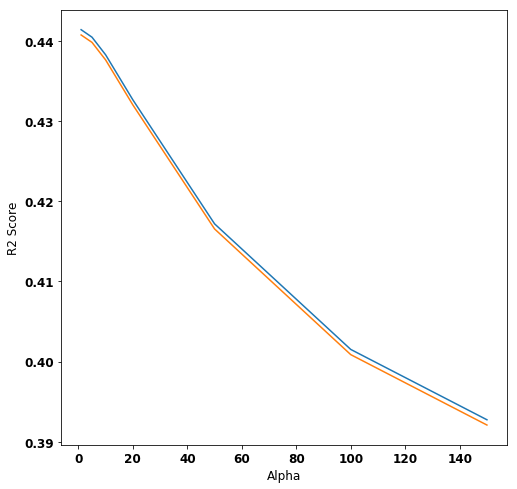

In [297]:
plt.figure(figsize=(8,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
#plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [298]:

# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1.0}

In [299]:
#model with optimal alpha
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))
print(mean_squared_error(y_train,y_pred_train))
y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))
print(mean_squared_error(y_test,y_pred_test))

0.44137502239734316
4168.13455205168
0.4289990924010867
4151.7863366798165


As we can see, even with ridge, we are getting similar R2_Score. let's go for boosting now

## Boosting

In [300]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [301]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)


In [302]:
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

## Prediction with boosting

In [303]:
predict = GBoost.predict(X_test)

In [304]:
print("Root mean squared error is:")
np.sqrt(metrics.mean_squared_error(y_test,predict))

Root mean squared error is:


57.4176764174473

In [305]:
print('r2 score is:')
r2 = r2_score(y_test,predict)
r2*100

r2 score is:


54.65879789505097

In [306]:
print("Mean absolute error is:")
mean_absolute_error(y_test,predict)

Mean absolute error is:


40.56731866834306

## Boosting has significantly increased the R2 score from 43 to 55

### Final predictions

In [307]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predict.flatten()})
error_diff1 = error_diff.head(20)

In [308]:
error_diff1.head(20)

,Actual Values,Predicted Values
0,40,39.32
1,280,170.83
2,77,40.96
3,250,164.04
4,80,75.03
5,50,56.94
6,134,129.15
7,225,249.32
8,65,50.79
9,149,156.95
